# **Objective:** Calculate the daily maximum wind speed (mph) for each Climate zone 1-9 (don’t include the Central Valley). 

## Inputs:
Using the WRF data and FDCZ (Fire Danger Climate Zone) shapefile, 

Attached is the FDCZ shapefile (tar file), land/sea mask file (nc file),  and the WRF netCDF data for a random day

## Outputs:
Create a map displaying each climate zone color coded by the maximum daily wind speed.   can be found at the link below.

Just to be clear, we are expecting a map of **maximum daily wind speed by zone** along with a file of the code you used to create that map.


    Created by Edwin Campos, on 2020 Apr.23
    Last modification on 2020 Apr.23 by ecampos.phd@gmail.com


In [1]:
# GLOBAL VARIABLES
WRF_FILE = 'wrf_daily_ts_2017-10-08.nc'
MASK_FILE='invariant_d01.nc'
SHAPE_PATH='./fdcz_pl/fdcz_pl'

## Read NetCDF files

References:

    https://anaconda.org/anaconda/netcdf4
    http://atmos.colostate.edu/~btrabing/Read_WRF.html
    https://stackoverflow.com/questions/35297771/wrf-netcdf-file-subset-smaller-array-out-of-dataset-based-on-coordinate-bounda

In [2]:
# Dependencies
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [3]:
# Input WRF dataset
wrf_data = Dataset(WRF_FILE, "r")
mask_data= Dataset(MASK_FILE, "r")

In [4]:
print(wrf_data.variables)

OrderedDict([('times', <class 'netCDF4._netCDF4.Variable'>
|S1 times(Time, DateStrLen)
unlimited dimensions: Time
current shape = (24, 19)
filling on, default _FillValue of   used
), ('T2', <class 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    stagger: 
    coordinates: XLONG XLAT
    units: K
    description: TEMP at 2 M
unlimited dimensions: Time
current shape = (24, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('RH2', <class 'netCDF4._netCDF4.Variable'>
float32 RH2(Time, south_north, west_east)
    description: Near-sfc RH
    units: %
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (24, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('U10', <class 'netCDF4._netCDF4.Variable'>
float32 U10(Time, south_north, west_east)
    stagger: 
    coordinates: XLONG XLAT
    units: m s-1
    description: U at 10m
unlimited dimensions: Time
current shape = (24, 320, 256)
fillin

In [5]:
print(mask_data.variables)

OrderedDict([('COSALPHA', <class 'netCDF4._netCDF4.Variable'>
float32 COSALPHA(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: Local cosine of map rotation
    units: 
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('HGT', <class 'netCDF4._netCDF4.Variable'>
float32 HGT(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: Terrain Height
    units: m
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 320, 256)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('LANDMASK', <class 'netCDF4._netCDF4.Variable'>
float32 LANDMASK(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LAND MASK (1 FOR LAND, 0 FOR WATER)
    units: 
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 320, 2

In [6]:
# Get the horizontal grid
lats = mask_data.variables['XLAT'][:]    # degree_north
longs = mask_data.variables['XLONG'][:]  # degree_east
print(lats)
print(longs)

[[[33.824394 33.825592 33.82678  ... 33.82678  33.825592 33.824394]
  [33.85127  33.85247  33.85365  ... 33.85365  33.85247  33.85127 ]
  [33.878147 33.879337 33.880527 ... 33.880527 33.879337 33.878147]
  ...
  [42.35921  42.360554 42.36189  ... 42.36189  42.360554 42.35921 ]
  [42.386093 42.38743  42.38876  ... 42.38876  42.38743  42.386093]
  [42.412956 42.41429  42.41563  ... 42.41563  42.41429  42.412956]]]
[[[-125.13013  -125.09778  -125.06543  ... -116.93457  -116.90222
   -116.86987 ]
  [-125.13158  -125.09921  -125.066864 ... -116.933136 -116.90079
   -116.86842 ]
  [-125.133026 -125.10065  -125.06827  ... -116.93173  -116.89935
   -116.866974]
  ...
  [-125.644516 -125.608154 -125.57178  ... -116.42822  -116.391846
   -116.355484]
  [-125.64633  -125.609955 -125.57358  ... -116.42642  -116.390045
   -116.35367 ]
  [-125.64816  -125.61177  -125.57538  ... -116.42462  -116.38823
   -116.35184 ]]]


In [7]:
# Get the Wind speed
u10 = wrf_data.variables['U10'][:]   # U component of wind at 10m, in m/s
v10 = wrf_data.variables['V10'][:]   # V component of wind at 10m, in m/s

**LAT** and **LON** are numpy arrays of shape (x,y)

**U** and **V** are numpy arrays of shape (time,x,y)

### Format the time values from bytes into strings

In [8]:
nctime = wrf_data.variables['times'][:] 
print(nctime)
nctime_str = [bytearray(x) for x in nctime]
print(nctime_str[:])

[[b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'0' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'1' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'2' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'3' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'4' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'5' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'6' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'7' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'8' b':'
  b'0' b'0' b':' b'0' b'0']
 [b'2' b'0' b'1' b'7' b'-' b'1' b'0' b'-' b'0' b'8' b'_' b'0' b'9' b':'
  b'0' b'0' b':' b'0' b'0']


In [9]:
times_str = [x.decode("utf-8") for x in nctime_str]
print(times_str)

['2017-10-08_00:00:00', '2017-10-08_01:00:00', '2017-10-08_02:00:00', '2017-10-08_03:00:00', '2017-10-08_04:00:00', '2017-10-08_05:00:00', '2017-10-08_06:00:00', '2017-10-08_07:00:00', '2017-10-08_08:00:00', '2017-10-08_09:00:00', '2017-10-08_10:00:00', '2017-10-08_11:00:00', '2017-10-08_12:00:00', '2017-10-08_13:00:00', '2017-10-08_14:00:00', '2017-10-08_15:00:00', '2017-10-08_16:00:00', '2017-10-08_17:00:00', '2017-10-08_18:00:00', '2017-10-08_19:00:00', '2017-10-08_20:00:00', '2017-10-08_21:00:00', '2017-10-08_22:00:00', '2017-10-08_23:00:00']


### Extract winds at a particular lat,lon

In [10]:
print(type(lats),lats.shape)
print(type(longs),longs.shape)
print(type(times_str), len(times_str) )
print(type(u10),u10.shape)
print(type(v10),v10.shape)

<class 'numpy.ma.core.MaskedArray'> (1, 320, 256)
<class 'numpy.ma.core.MaskedArray'> (1, 320, 256)
<class 'list'> 24
<class 'numpy.ma.core.MaskedArray'> (24, 320, 256)
<class 'numpy.ma.core.MaskedArray'> (24, 320, 256)


In [11]:
lat_obs = 37.7644
long_obs = -121.9540
coordinates = np.unravel_index((np.abs(lats - lat_obs) + 
                                np.abs(longs - long_obs)).argmin(), 
                               lats.shape)
print(coordinates)

(0, 143, 100)


In [12]:
# Validate
print(lats[coordinates], longs[coordinates])

37.751087 -121.938324


In [13]:
# Find pixel-range based on the provided lat-lon
def find_pixels(lat_array,  # Array with latitudes  in the NetCDF file
                lon_array,  # Array with longitudes in the NetCDF file
                mylat,     # Latitude value one to be matched to a pixel
                mylon):    # Longitude value to be matched to a pixel
    "Outputs: coordinates: (time_index, x_pixel_index, y_pixel_indes)"
    
    coordinates = np.unravel_index((np.abs(lat_array - mylat) + 
                                    np.abs(lon_array - mylon)).argmin(), 
                                   lat_array.shape)
    
    return coordinates

In [14]:
# Validate
san_ramon_lat = 37.7644
san_ramon_lon = -121.9540
pixel_coordinates = find_pixels(lat_array=lats, 
                          lon_array=longs,
                          mylat=san_ramon_lat,
                          mylon=san_ramon_lon)
print(pixel_coordinates, pixel_coordinates[1:])
print(lats[pixel_coordinates], longs[pixel_coordinates])

(0, 143, 100) (143, 100)
37.751087 -121.938324


In [15]:
# List wind values
u10_time = u10[:,pixel_coordinates[1], pixel_coordinates[2]]
print('u10:', u10_time)
v10_time = v10[:,pixel_coordinates[1], pixel_coordinates[2]]
print('v10:', v10_time)
speed_time = (u10_time**2 + v10_time**2)**0.5
print(speed_time)

# I manualy validated for speed_time[0] and speed_time[-1]

u10: [ 1.43788     1.0371825  -1.1281722   0.24685748  0.7650842   1.6698962
  1.8408111   1.7607706   1.5985771   1.933602    2.0516458   2.2162855
  1.6295602   1.6050293   1.3692856   2.303459    2.0056553   1.7469375
  1.9214604   2.5303571   2.8808727   2.6294363   1.6649076   1.3128626 ]
v10: [ 0.3964637  -0.66054946  0.142182    1.6731651   1.530715    0.08108234
 -1.5829245  -2.7210696  -0.1800741  -3.9051445  -6.186078   -7.140886
 -6.8337164  -6.7692394  -6.7861214  -7.44211    -7.4399447  -7.3176064
 -6.3386025  -7.175972   -6.486578   -5.3904963  -4.635575   -5.8391914 ]
[1.4915369 1.2296638 1.1370964 1.6912776 1.7112691 1.6718636 2.4278047
 3.2410698 1.6086875 4.3576336 6.517424  7.476909  7.025322  6.9569187
 6.9228888 7.790438  7.7055454 7.523241  6.623435  7.6090264 7.0975432
 5.997615  4.925492  5.9849615]


## Read Shape files with PyShp

References:
    
    https://pypi.org/project/pyshp/
    

In [16]:
# Dependencies
import shapefile
import pandas as pd

In [17]:
# Get data (simply specify the base filename of the shapefile)
sf_data = shapefile.Reader(SHAPE_PATH)

There are 3 key files associated with any and all shapefiles:

    .shp: the file that contains the geometry for all features.
    .shx: the file that indexes the geometry.
    .dbf: the file that stores feature attributes in a tabular format.

Note that, sometimes, a shapefile will have other associated files including:

    .prj: the file that contains information on projection format including the coordinate system and projection information. It is a plain text file describing the projection using well-known text (WKT) format.
    .sbn and .sbx: the files that are a spatial index of the features.
    .shp.xml: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).

In [18]:
#sf_data = shapefile.Reader(SHAPE_PATH)  # Open, read, and close the shapefiles
shapes = sf_data.shapes()  # Geometry: shp file with points, polygons, or polines
fields = sf_data.fields    # Atributes: shx file with headers. This file is optional for reading.
records= sf_data.records() # Records: dbf file with contents

In [19]:
print(fields)
#print('NumShapes=',len(shapes))
#[[longi,lati]] = shapes[3].points
#print(shapes[3].points)

[('DeletionFlag', 'C', 1, 0), ['OBJECTID', 'N', 10, 0], ['FDCZ', 'C', 10, 0], ['Shape_Leng', 'F', 19, 11], ['Shape_Area', 'F', 19, 11]]


In [20]:
print(sf_data)
print(sf_data.shapeType)

shapefile Reader
    9 shapes (type 'POLYGON')
    9 records (5 fields)
5


Shape types are represented by numbers between 0 and 31 as defined by the shapefile specification and listed below (existing shape types are not sequential):

    NULL = 0
    POINT = 1
    POLYLINE = 3
    POLYGON = 5
    MULTIPOINT = 8
    POINTZ = 11
    POLYLINEZ = 13
    POLYGONZ = 15
    MULTIPOINTZ = 18
    POINTM = 21
    POLYLINEM = 23
    POLYGONM = 25
    MULTIPOINTM = 28
    MULTIPATCH = 31

In [21]:
sf_data.records()[:]

[Record #0: [1, '2', 1390085.42269, 17666548994.1],
 Record #1: [2, '7', 729435.83367, 15430289623.4],
 Record #2: [3, '4', 958413.83175, 9903732149.59],
 Record #3: [4, '8', 1449745.07201, 30082596718.2],
 Record #4: [5, '1', 723620.623482, 13363523334.2],
 Record #5: [6, 'CV', 1683096.83967, 43468179793.4],
 Record #6: [7, '6', 1499360.10436, 35517704400.4],
 Record #7: [8, '5', 1025812.3241, 23459612723.5],
 Record #8: [10, '3', 1108384.9473, 14491501654.0]]

In [22]:
sf_data.fields

[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 10, 0],
 ['FDCZ', 'C', 10, 0],
 ['Shape_Leng', 'F', 19, 11],
 ['Shape_Area', 'F', 19, 11]]

In [23]:
s=sf_data.shape(2)
# Read the bbox of the 1th shape to verify
# Round coordinates to 3 decimal places
['%.3f' % coord for coord in s.bbox]

['591356.500', '3818301.180', '799052.350', '4079924.970']

**Why these doesn't look like Latitudes and Longitudes?**

The reason is that we need to read the *.prj projection file to do the conversion. However, PyShp does not handle projections.

**==> Use a different tool**, e.g., GeoPandas or Fiona, or osgeo, or ogr




##### Convert shapefile data into a Pandas dataframe
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

sf_df = read_shapefile(sf_data)
print(sf_df.shape)

## Read Shape files with GeoPandas

References:

    https://pypi.org/project/geopandas/
    https://geopandas.org/projections.html
            

In [24]:
import geopandas

In [25]:
#df = geopandas.read_file(geopandas.datasets.get_path('fdcz_pl'))
geodf = geopandas.read_file("fdcz_pl")

In [26]:
# Coordinate Reference Systems
print( geodf.crs, type(geodf.crs) ) 
cord_ref_sys = str(list(geodf.crs.values())[0])
print( cord_ref_sys, type(cord_ref_sys) )

{'init': 'epsg:26910'} <class 'dict'>
epsg:26910 <class 'str'>


In [27]:
print(geodf.shape, geodf.columns)

(9, 5) Index(['OBJECTID', 'FDCZ', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')


In [48]:
print('ORIGINAL:')
print(geodf)
geodf_geo = geodf.to_crs(epsg=4326)
print('\n','LAT,LON PROJECTED:')
print(geodf_geo)

ORIGINAL:
   OBJECTID FDCZ    Shape_Leng    Shape_Area  \
0         1    2  1.390085e+06  1.766655e+10   
1         2    7  7.294358e+05  1.543029e+10   
2         3    4  9.584138e+05  9.903732e+09   
3         4    8  1.449745e+06  3.008260e+10   
4         5    1  7.236206e+05  1.336352e+10   
5         6   CV  1.683097e+06  4.346818e+10   
6         7    6  1.499360e+06  3.551770e+10   
7         8    5  1.025812e+06  2.345961e+10   
8        10    3  1.108385e+06  1.449150e+10   

                                            geometry  
0  MULTIPOLYGON (((519551.640 4297033.400, 519732...  
1  POLYGON ((672018.920 4264044.500, 664624.110 4...  
2  POLYGON ((617417.000 4079543.780, 617489.360 4...  
3  POLYGON ((630040.320 4568638.610, 630162.520 4...  
4  POLYGON ((501997.180 4452796.830, 501999.880 4...  
5  POLYGON ((572281.380 4445705.500, 573752.440 4...  
6  POLYGON ((897800.710 3869673.770, 898319.660 3...  
7  POLYGON ((652128.040 4116463.650, 652149.990 4...  
8  MULTIPOLYGO

In [ ]:
POR ACA VOY

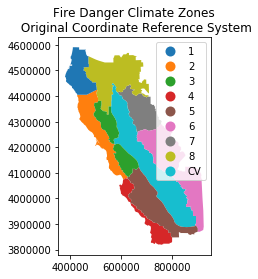

In [44]:
# Visualize Shapefiles in Original Projection
ax = geodf.plot(column='FDCZ',legend=True)
ax.set_title("Fire Danger Climate Zones\n Original Coordinate Reference System");

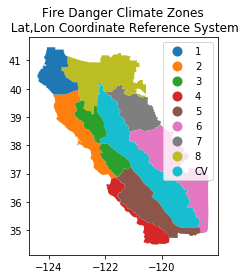

In [41]:
# Visualize map in Lat Lon coordinates
ax = geodf_geo.plot(column='FDCZ',legend=True)
ax.set_title("Fire Danger Climate Zones\n Lat,Lon Coordinate Reference System");

In [34]:
print(geodf_geo.geometry[0])

MULTIPOLYGON (((-122.7747727538385 38.82186730699994, -122.7726981541765 38.82068276710828, -122.7713163648501 38.82019001871402, -122.771157251096 38.82002001835325, -122.7709317857853 38.81988638476052, -122.7704554832423 38.81970089193312, -122.7702036636312 38.81945275756246, -122.7700309322793 38.81911276968652, -122.7698200213396 38.8189681684017, -122.7696217662942 38.81879277194275, -122.7697427127306 38.81843633036088, -122.7694181457334 38.81763816160372, -122.769070977981 38.81713498776604, -122.7747727538385 38.82186730699994)), ((-122.7747727538385 38.82186730699994, -122.7727721647484 38.77928843094971, -122.7638873481781 38.74166161315934, -122.7581790799071 38.69117993032793, -122.7551080965515 38.67648705359714, -122.7551077578078 38.67648525051997, -122.7616712920076 38.66615951548039, -122.7616716389345 38.66615888535734, -122.7605116652478 38.66479455413247, -122.759351735507 38.66343021122724, -122.7578782258722 38.66133533713334, -122.7578774255576 38.661334073815

## Point in Polygon with Ray Casting Algorithm

References:
    
    https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm
    
    https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html